In [8]:
# Import libraries
import pandas as pd
import os


# Check current working directory
print(os.getcwd())

# Load merged dataset 
df = pd.read_pickle('/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.9/ords_prods_customers_updated_part22.pkl')  
# Display basic info
df.head()
df.info()

/Users/am/01.10.2025/03 Scripts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 27 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   user_id                 int64         
 2   eval_set                object        
 3   order_number            int64         
 4   order_dow               int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  _merge                  category      
 11  product_name            object        
 12  aisle_id                int64         
 13  department_id           int64         
 14  prices                  float64       
 15  max_order               int64         
 16  loyalty_flag            object        
 17  order_freque

In [3]:
#The merged dataset contains 30.6 million entries across 27 columns, combining detailed order, product, and customer demographic information for in-depth analysis.

2.0

In [9]:
# first_name, surname:These should be removed or anonymized-I Choose to remove as I dont need them. #I wouldn if this was a banking or payment system, then I would anonymize them.
# Safely drop columns even if they don't exist
df = df.drop(columns=['first_name', 'surname'], errors='ignore')

# Confirm they're gone
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   user_id                 int64         
 2   eval_set                object        
 3   order_number            int64         
 4   order_dow               int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  _merge                  category      
 11  product_name            object        
 12  aisle_id                int64         
 13  department_id           int64         
 14  prices                  float64       
 15  max_order               int64         
 16  loyalty_flag            object        
 17  order_frequency_flag    object        
 18  

In [10]:
# Define state groupings
northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
south = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV',
         'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']
west = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY',
        'AK', 'CA', 'HI', 'OR', 'WA']

# Function to assign region based on state
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

# Apply function to create new column
df['region'] = df['state'].apply(assign_region)

# Check value counts
df['region'].value_counts(dropna=False)

region
Other    30629741
Name: count, dtype: int64

In [11]:
#too many other
df['state'].unique()


array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Virginia', 'Connecticut', 'Kentucky',
       'Oregon', 'South Dakota', 'Michigan', 'New Jersey', 'Arizona',
       'Maine', 'Ohio', 'Hawaii', 'Minnesota', 'Illinois', 'Idaho',
       'Kansas', 'North Carolina', 'Vermont', 'Alaska', 'Delaware',
       'Maryland', 'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Colorado', 'Florida',
       'South Carolina', 'Rhode Island', 'Washington', 'California',
       'Mississippi', 'Texas', 'New Mexico', 'Missouri', 'Wyoming',
       'New Hampshire', 'Massachusetts', 'Pennsylvania', 'Wisconsin',
       'West Virginia', 'North Dakota', 'New York'], dtype=object)

In [12]:
# Full state names grouped by region
northeast = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
    'Vermont', 'New Jersey', 'New York', 'Pennsylvania'
]

midwest = [
    'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
    'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska',
    'North Dakota', 'South Dakota'
]

south = [
    'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
    'Virginia', 'District of Columbia', 'West Virginia',
    'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas',
    'Louisiana', 'Oklahoma', 'Texas'
]

west = [
    'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico',
    'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'
]


In [13]:
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'


In [14]:
# Apply the function to the 'state' column
df['region'] = df['state'].apply(assign_region)

# Check the distribution
df['region'].value_counts(dropna=False)


region
South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: count, dtype: int64

In [15]:
df['region'] = df['region'].fillna('Unknown')


In [16]:
#The dataset shows the highest customer activity in the South region, followed by the West, Midwest, and Northeast.


In [17]:
df.columns.tolist()


['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'max_order',
 'loyalty_flag',
 'order_frequency_flag',
 'Gender',
 'state',
 'age',
 'date_joined',
 'num_dependants',
 'family_status',
 'income',
 'region']

In [18]:
#calculate spending average user

# Step 1: Calculate average spending per customer
avg_spend_per_user = df.groupby('user_id')['prices'].mean().reset_index()
avg_spend_per_user.columns = ['user_id', 'avg_spending']

# Step 2: Merge back into main DataFrame
df = pd.merge(df, avg_spend_per_user, on='user_id', how='left')

In [19]:
# Step 3: Create spending flag
df['spender_flag'] = df['avg_spending'].apply(lambda x: 'High spender' if x >= 10 else 'Low spender')

# Optional: Check distribution
print(df['spender_flag'].value_counts(normalize=True))

spender_flag
Low spender     0.996296
High spender    0.003704
Name: proportion, dtype: float64


In [27]:
#The vast majority of customers (about 99.6%) are low spenders with an average spending below $10, while only a small fraction (around 0.37%) are high spenders averaging $10 or more.

In [20]:
# Re-create flag with $5 threshold
df['spender_flag'] = df['avg_spending'].apply(lambda x: 'High spender' if x >= 5 else 'Low spender')


print(df['spender_flag'].value_counts(normalize=True))


spender_flag
High spender    0.997321
Low spender     0.002679
Name: proportion, dtype: float64


In [21]:
#In this case, almost all customers (about 99.7%) are high spenders with average 
#spending above $10, and only a very small fraction (around 0.27%) are low spenders.
#It means your marketing and sales efforts should primarily focus on retaining and upselling to the high spender segment,
#since they make up almost the entire customer base and likely generate most of your revenue.

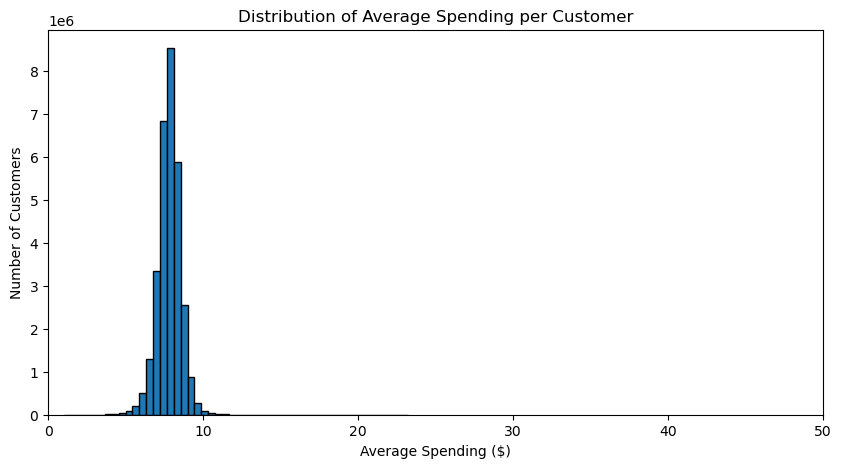

count    3.062974e+07
mean     7.791917e+00
std      7.340997e-01
min      1.000000e+00
25%      7.379406e+00
50%      7.812698e+00
75%      8.229583e+00
max      2.320000e+01
Name: avg_spending, dtype: float64
0    6.367797
1    6.367797
2    6.367797
3    6.367797
4    6.367797
5    6.367797
6    6.367797
7    6.367797
8    6.367797
9    6.367797
Name: avg_spending, dtype: float64


In [44]:
#exploring average spending
# Step 1: Calculate average spending per user_id
user_avg_spending = df.groupby('user_id')['prices'].mean().reset_index()

# Step 2: Rename the column to 'avg_spending'
user_avg_spending = user_avg_spending.rename(columns={'prices': 'avg_spending'})

# Step 3: Merge back with the original DataFrame if needed (optional)
# This adds the avg_spending column to all rows of df based on user_id
df = df.merge(user_avg_spending, on='user_id', how='left')

# Step 4: Now plot the histogram of avg_spending
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df['avg_spending'], bins=50, edgecolor='k')
plt.title('Distribution of Average Spending per Customer')
plt.xlabel('Average Spending ($)')
plt.ylabel('Number of Customers')
plt.xlim(0, 50)  # zoom in to see majority of spending
plt.show()

# Optional: Check stats and first few values
print(df['avg_spending'].describe())
print(df['avg_spending'].head(10))

In [ ]:
#Most customers spend consistently around $7.79 per order, with very few outliers spending significantly more or less.

In [22]:
print(df.columns)
print(df.head(2)[['state', 'region', 'spender_flag']])


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag',
       'order_frequency_flag', 'Gender', 'state', 'age', 'date_joined',
       'num_dependants', 'family_status', 'income', 'region', 'avg_spending',
       'spender_flag'],
      dtype='object')
     state region  spender_flag
0  Alabama  South  High spender
1  Alabama  South  High spender


In [23]:
# Full state names grouped by region
northeast = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
    'Vermont', 'New Jersey', 'New York', 'Pennsylvania'
]

midwest = [
    'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
    'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska',
    'North Dakota', 'South Dakota'
]

south = [
    'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
    'Virginia', 'District of Columbia', 'West Virginia',
    'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas',
    'Louisiana', 'Oklahoma', 'Texas'
]

west = [
    'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico',
    'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'
]

def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

df['region'] = df['state'].apply(assign_region)

In [24]:
# Crosstab spending flag by region, showing proportion within each region
spending_by_region = pd.crosstab(df['region'], df['spender_flag'], normalize='index') 

print(spending_by_region)

spender_flag  High spender  Low spender
region                                 
Midwest           0.997497     0.002503
Northeast         0.997619     0.002381
South             0.997132     0.002868
West              0.997199     0.002801


In [25]:
# Test Spenderflag - Should print True if the column exists
print('spender_flag' in df.columns) 


True


In [26]:
# Create Spenderflag as it is false

threshold = 50  # I can tweak this number based on data insights

df['spender_flag'] = df['avg_spending'].apply(lambda x: 'High spender' if x > threshold else 'Low spender')


In [27]:
# show average spender

print(df[['avg_spending', 'spender_flag']].head(10))


   avg_spending spender_flag
0      6.367797  Low spender
1      6.367797  Low spender
2      6.367797  Low spender
3      6.367797  Low spender
4      6.367797  Low spender
5      6.367797  Low spender
6      6.367797  Low spender
7      6.367797  Low spender
8      6.367797  Low spender
9      6.367797  Low spender


In [28]:
# show spending per region


spending_by_region = pd.crosstab(df['region'], df['spender_flag'], normalize='index')
print(spending_by_region)


spender_flag  Low spender
region                   
Midwest               1.0
Northeast             1.0
South                 1.0
West                  1.0


In [29]:
#low_activity_flag
df['low_activity_flag'] = df['order_number'].apply(lambda x: 'Low activity' if x < 5 else 'Active')

In [30]:
#filter
df_active = df[df['low_activity_flag'] == 'Active']

In [ ]:
def customer_profile(row):
    if row['age'] < 35 and row['num_dependants'] == 0:
        return 'Young adult'
    elif row['age'] < 35 and row['num_dependants'] > 0:
        return 'Young parent'
    elif row['age'] >= 35 and row['income'] > 100000 and row['num_dependants'] >= 2:
        return 'Affluent family'
    elif row['age'] >= 60:
        return 'Senior'
    else:
        return 'Other'

df_active['profile'] = df_active.apply(customer_profile, axis=1)


In [ ]:
#Step 5: Compare Profiles with Region and Department
# Profile by region
profile_region_ct = pd.crosstab(df_active['profile'], df_active['region'], normalize='index')
print(profile_region_ct)

# Profile by department
profile_dept_ct = pd.crosstab(df_active['profile'], df_active['department_id'])
print(profile_dept_ct.head())

In [ ]:
#visualization

profile_region_ct.plot(kind='bar', stacked=True, figsize=(10,6), title='Profile Distribution Across Regions')
plt.ylabel('Proportion')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [ ]:
#Check Profile Distribution

print(df_active['profile'].value_counts(dropna=False))


In [ ]:

#Then visualize:import matplotlib.pyplot as plt

df_active['profile'].value_counts().plot(kind='bar', 
                                         title='Customer Profile Distribution',
                                         color='teal')
plt.xlabel('Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Aggregated statistics by 'profile' for the full dataset
profile_summary = df.groupby('profile').agg({
    'max_order': ['min', 'mean', 'max'],
    'avg_spending': ['min', 'mean', 'max']
})

# Round and print
profile_summary = profile_summary.round(2)
print(profile_summary)

print(df.columns)


In [ ]:
#3. Check Regional Profile Mix
profile_region_ct = pd.crosstab(df_active['profile'], df_active['region'], normalize='index')

print(profile_region_ct.round(3))  # Rounded for easier reading

# Visualize
profile_region_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Customer Profiles by Region')
plt.ylabel('Proportion')
plt.xlabel('Customer Profile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#4. Compare Profiles with Departments (Optional but useful)
rofile_department_ct = pd.crosstab(df_active['profile'], df_active['department_id'], normalize='index')
print(profile_department_ct.head())  # First few rows

# Optional: Heatmap-style visual using seaborn
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(profile_department_ct, cmap='YlGnBu')
plt.title('Customer Profile vs Department ID')
plt.xlabel('Department ID')
plt.ylabel('Customer Profile')
plt.tight_layout()
plt.show()

In [ ]:
# Drop duplicate columns if they exist
df_active = df_active.drop(columns=['avg_spending_x', 'avg_spending_y'], errors='ignore')

# Recheck for nulls in key columns
print(df_active[['profile', 'region', 'avg_spending']].isnull().sum())

# Save final version as pickle (optional but ideal)
df_active.to_pickle('/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.10 Coding Etiquette & Excel Reporting/Part1_final.pkl')

In [ ]:
import os
print("Current working directory:")
print(os.getcwd())